<a href="https://colab.research.google.com/github/Sanshiya-23/Applied-Data-Science-Assignment-1/blob/main/MLN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16


In [ ]:

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()




In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

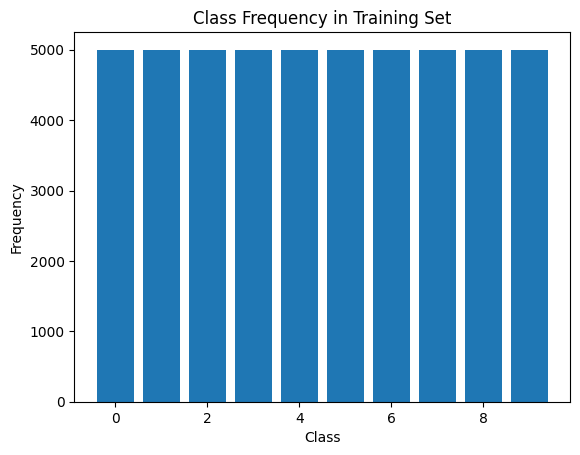

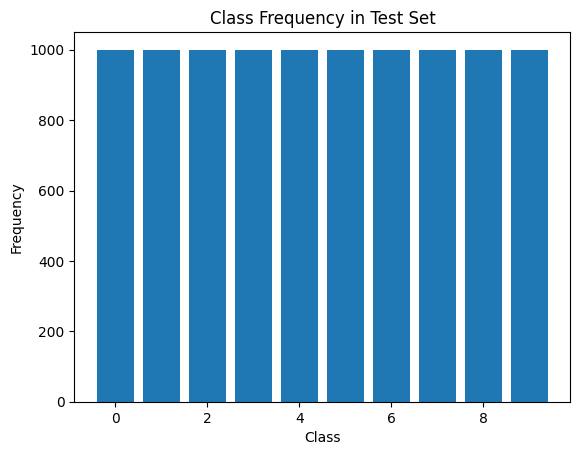

In [ ]:
# Count the number of occurrences of each class in the training set
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Class Frequency in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Repeat for the test set
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)
plt.title('Class Frequency in Test Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
y_train= to_categorical(y_train,num_classes=10)
y_test= to_categorical(y_test,num_classes=10)


In [ ]:
# Normalize data to the range [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [ ]:
# Specifying the model
model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# Compiling the Model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Fit and Train the model
training = model.fit(x_train, y_train, validation_split=0.2, batch_size=64, epochs=20)


Epoch 1/20
625/625 [==============================] - 91s 144ms/step - loss: 1.6864 - accuracy: 0.3822 - val_loss: 1.3754 - val_accuracy: 0.5209
Epoch 2/20
625/625 [==============================] - 86s 137ms/step - loss: 1.3897 - accuracy: 0.4997 - val_loss: 1.1993 - val_accuracy: 0.5935
Epoch 3/20
625/625 [==============================] - 83s 132ms/step - loss: 1.2746 - accuracy: 0.5444 - val_loss: 1.0839 - val_accuracy: 0.6290
Epoch 4/20
625/625 [==============================] - 83s 133ms/step - loss: 1.1945 - accuracy: 0.5735 - val_loss: 1.0199 - val_accuracy: 0.6518
Epoch 5/20
625/625 [==============================] - 84s 134ms/step - loss: 1.1377 - accuracy: 0.5983 - val_loss: 0.9759 - val_accuracy: 0.6690
Epoch 6/20
625/625 [==============================] - 84s 135ms/step - loss: 1.0977 - accuracy: 0.6107 - val_loss: 0.9582 - val_accuracy: 0.6755
Epoch 7/20
625/625 [==============================] - 81s 129ms/step - loss: 1.0606 - accuracy: 0.6254 - val_loss: 0.9881 - val_ac

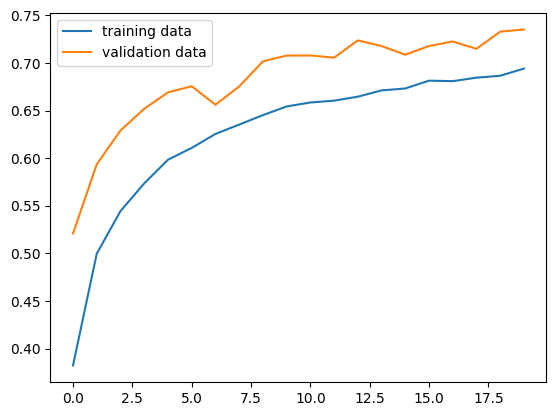

In [ ]:
# Checking for Overfiiting
import matplotlib.pyplot as plt
# Learning Curve
plt.plot(training.history['accuracy'], label='training data')
plt.plot(training.history['val_accuracy'], label='validation data')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.7912 - accuracy: 0.7275


[0.7911516427993774, 0.7275000214576721]

In [ ]:
import numpy as np
prediction=model.predict(x_test)
predicted_labels= np.argmax(prediction, axis=1)

actual_label=np.argmax(y_test, axis=1)

313/313 [==============================] - 6s 17ms/step


In [ ]:
from sklearn import metrics

print(metrics.classification_report(actual_label,predicted_labels))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.79      0.91      0.85      1000
           2       0.61      0.64      0.62      1000
           3       0.53      0.56      0.54      1000
           4       0.71      0.62      0.66      1000
           5       0.63      0.62      0.63      1000
           6       0.76      0.83      0.80      1000
           7       0.82      0.74      0.78      1000
           8       0.82      0.83      0.83      1000
           9       0.86      0.75      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



<Axes: >

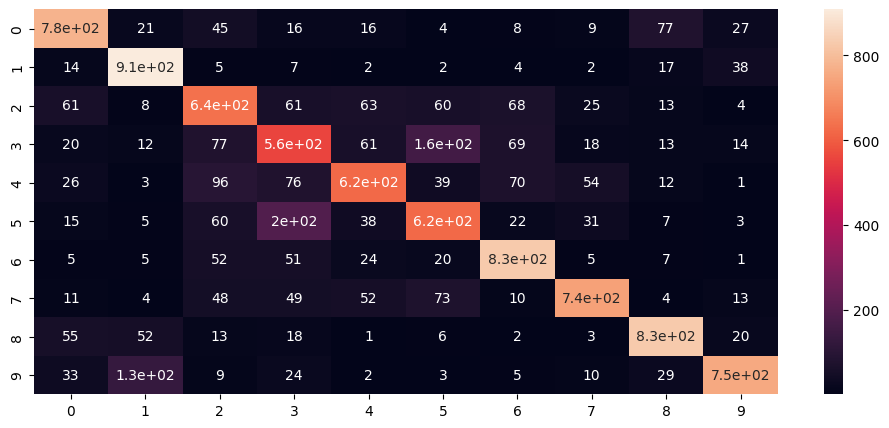

In [ ]:
from functools import cmp_to_key
plt.figure(figsize=(12,5))
cm=metrics.confusion_matrix(actual_label,predicted_labels)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
###Transfer learning using VGG16 Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data Preprocessing
x_train_preprocessed = preprocess_input(x_train * 255)
x_test_preprocessed = preprocess_input(x_test * 255)


In [ ]:
# Initialize VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Set layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False

# Adding custom Layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Creating final model
model_transfer = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# Compile the model
model_transfer.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

datagen.fit(x_train_preprocessed)

In [ ]:
# Training the model
training_transfer = model_transfer.fit(
    datagen.flow(x_train_preprocessed, y_train, batch_size=64),
    validation_data=(x_test_preprocessed, y_test),
    steps_per_epoch=len(x_train) / 64,
    epochs=15
)

Epoch 1/15
781/781 [==============================] - 755s 964ms/step - loss: 2.8230 - accuracy: 0.3765 - val_loss: 1.2959 - val_accuracy: 0.5529
Epoch 2/15
781/781 [==============================] - 795s 1s/step - loss: 1.5343 - accuracy: 0.4649 - val_loss: 1.1801 - val_accuracy: 0.5869
Epoch 3/15
781/781 [==============================] - 752s 962ms/step - loss: 1.4300 - accuracy: 0.4990 - val_loss: 1.1263 - val_accuracy: 0.6062
Epoch 4/15
781/781 [==============================] - 771s 988ms/step - loss: 1.3790 - accuracy: 0.5171 - val_loss: 1.1233 - val_accuracy: 0.6126
Epoch 5/15
781/781 [==============================] - 808s 1s/step - loss: 1.3544 - accuracy: 0.5313 - val_loss: 1.0737 - val_accuracy: 0.6263
Epoch 6/15
781/781 [==============================] - 759s 972ms/step - loss: 1.3289 - accuracy: 0.5391 - val_loss: 1.0815 - val_accuracy: 0.6256
Epoch 7/15
781/781 [==============================] - 744s 953ms/step - loss: 1.3217 - accuracy: 0.5434 - val_loss: 1.0902 - val_a

In [ ]:
# Unfreeze the last 4 layers for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True


In [ ]:

# Recompile the model for fine-tuning
model_transfer.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
# Fine-tuning the model
fine_tuning = model_transfer.fit(
    datagen.flow(x_train_preprocessed, y_train, batch_size=64),
    validation_data=(x_test_preprocessed, y_test),
    steps_per_epoch=len(x_train) / 64,
    epochs=10
)

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fine_tuning.history['accuracy'])
plt.plot(fine_tuning.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(fine_tuning.history['loss'])
plt.plot(fine_tuning.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
# Predictions
predictions = model_transfer.predict(x_test_preprocessed)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_true, y_pred))

# Classification Report
print("\nClassification Report")
print(classification_report(y_true, y_pred))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2




In [ ]:
# Define the model
model = Sequential()

# Add a Dense layer with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))


# Unfreeze the last 8 layers for fine-tuning
for layer in base_model.layers[-8:]:
    layer.trainable = True



In [ ]:
# Recompile the model for fine-tuning
model_transfer.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
# Fine-tuning the model
fine_tuning = model_transfer.fit(
    datagen.flow(x_train_preprocessed, y_train, batch_size=64),
    validation_data=(x_test_preprocessed, y_test),
    steps_per_epoch=len(x_train) / 64,
    epochs=20
)

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fine_tuning.history['accuracy'])
plt.plot(fine_tuning.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(fine_tuning.history['loss'])
plt.plot(fine_tuning.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
# Predictions
predictions = model_transfer.predict(x_test_preprocessed)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(y_true, y_pred))

# Classification Report
print("\nClassification Report")
print(classification_report(y_true, y_pred))